## Observations and Insights 

In [71]:
# Dependencies and Setup

import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

# Study data files
Mouse_metadata_path = "Resources/Mouse_metadata.csv"
Study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
Mouse_metadata = pd.read_csv(Mouse_metadata_path)
Study_results = pd.read_csv(Study_results_path)

# Combine the data into a single dataset

# Merge two dataframes using an inner join
mouse_study = pd.merge(Study_results, Mouse_metadata, how = "left", on="Mouse ID")
mouse_study


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [72]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study.duplicated(subset=['Mouse ID', 'Timepoint'])
mouse_study_id = mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint']),"Mouse ID"]
mouse_study_id

137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object

In [73]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_study.loc[mouse_study["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [74]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cur_mouse = mouse_study.loc[mouse_study["Mouse ID"] != "g989"]
cur_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [75]:
# Checking the number of mice in the clean DataFrame.
#Current Mouse count
len(cur_mouse["Mouse ID"].unique())

248

## Summary Statistics

In [76]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

cm_mean = cur_mouse.groupby(['Drug Regimen']).mean()["Tumor Volume (mm3)"]
cm_med = cur_mouse.groupby(['Drug Regimen']).median()["Tumor Volume (mm3)"]
cm_var = cur_mouse.groupby(['Drug Regimen']).var()["Tumor Volume (mm3)"]
cm_std = cur_mouse.groupby(['Drug Regimen']).std()["Tumor Volume (mm3)"]
cm_sem = cur_mouse.groupby(['Drug Regimen']).sem()["Tumor Volume (mm3)"]

In [77]:
#Summary Table 
cur_cm_summary_table = pd.DataFrame(cm_mean)
cur_cm_summary_table["Tumor Volume Mean"]=cm_mean
cur_cm_summary_table["Tumor Volume Median"]=cm_med
cur_cm_summary_table["Tumor Volume Variance"]=cm_var
cur_cm_summary_table["Tumor Volume Standard Deviation"]=cm_std
cur_cm_summary_table["Tumor Volume Median"]=cm_sem
cur_cm_summary_table

,Tumor Volume (mm3),Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation
Drug Regimen,,,,,
Capomulin,40.675741,40.675741,0.329346,24.947764,4.994774
Ceftamin,52.591172,52.591172,0.469821,39.290177,6.268188
Infubinol,52.884795,52.884795,0.492236,43.128684,6.567243
Ketapril,55.235638,55.235638,0.603860,68.553577,8.279709
Naftisol,54.331565,54.331565,0.596466,66.173479,8.134708
Placebo,54.033581,54.033581,0.581331,61.168083,7.821003
Propriva,52.320930,52.320930,0.544332,43.852013,6.622085
Ramicane,40.216745,40.216745,0.320955,23.486704,4.846308
Stelasyn,54.233149,54.233149,0.573111,59.450562,7.710419


In [78]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

cur_mouse_agg = cur_mouse.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median', 'var', 'std', 'sem'])
cur_mouse_agg


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [79]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pandas_bar = cur_mouse.groupby("Drug Regimen")
mouse_tp = pandas_bar['Timepoint'].count()
print(mouse_tp)


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64


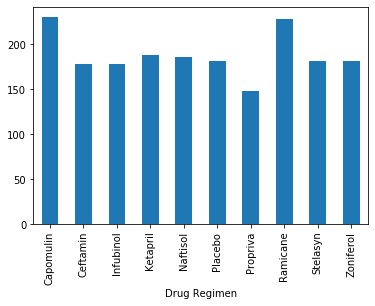

In [80]:
mouse_tp = mouse_tp.plot(kind='bar')

pandas_bar = cur_mouse 
x_axis = np.arange(len(pandas_bar))
tick_locations = [value for value in x_axis]



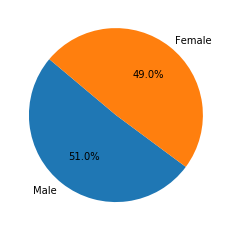

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender = cur_mouse['Sex'].value_counts()

# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender, labels= gender.index.values, autopct="%1.1f%%", startangle=140)

plt.show()
 

## Quartiles, Outliers and Boxplots

In [82]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

print(cur_mouse)


     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        f932          0           45.000000                 0     Ketapril   
2        g107          0           45.000000                 0     Ketapril   
3        a457          0           45.000000                 0     Ketapril   
4        c819          0           45.000000                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   
1890     p438         45           61.433892                 1     Ceftamin   
1891     x773         45           58.634971                 4      Placebo   
1892     b879         45           72.555239                 2     Stelasyn   

         Sex  Age_months  Weight (g)  
0     Female

In [89]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#capo_mouse = pd.merge(cur_mouse, how = "left', on='Tumor Volume (mm3))
#print(capo_mouse)



SyntaxError: EOL while scanning string literal (<ipython-input-89-7993e6ec801c>, line 2)

In [88]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [85]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [106]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mouse = cur_mouse.loc[cur_mouse["Mouse ID"] == "Capomulin"]
cur_mouse.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


Text(0, 0.5, 'Tumor Volume (mm3)')

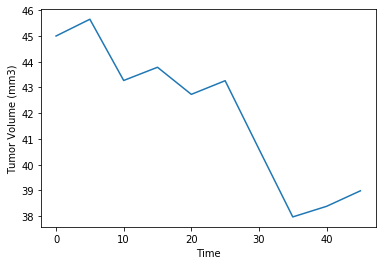

In [108]:
cap_mouse = cur_mouse.loc[cur_mouse["Mouse ID"] == "b128"]
#cur_mouse.head()
plt.plot(cap_mouse['Timepoint'], cap_mouse['Tumor Volume (mm3)'])
plt.xlabel('Time')
plt.ylabel('Tumor Volume (mm3)')


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


